# <span style='color:red'> Predict electricity consumption of a building using Scikit-learn.   </span>

# <span style='color:Blue'> Task one :import libraries and helper functions.   </span>

In [41]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

 
# <span style='color:blue'> Task two : Import the  the building dataset based on geographical location and usage in an interactive way</span>

## <span style='color:blue'> 2.1 : Import the metadata file    </span>
The metadata is saved in meta_open.csv file.We will use pandas to import the data  

In [2]:
#import the metadata file 
metadata = pd.read_csv("data/meta_open.csv")

In [3]:
#test 
metadata.head()

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename,annualschedule
0,Office_Abbey,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,74180.0,6891.544540,College/University,America/Phoenix,1930,Abbey,Office,weather0.csv,schedule2.csv
1,Office_Abigail,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,9703.0,901.437809,College/University,America/Phoenix,1940,Abigail,Office,weather0.csv,schedule2.csv
2,Office_Al,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,118966.0,11052.298300,College/University,America/Phoenix,1988,Al,Office,weather0.csv,schedule2.csv
3,Office_Alannah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,10135.0,941.571905,College/University,America/Phoenix,NaN,Alannah,Office,weather0.csv,schedule2.csv
4,Office_Aliyah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,202435.0,18806.818810,College/University,America/Phoenix,1967,Aliyah,Office,weather0.csv,schedule2.csv


## <span style='color:blue'> 2.2 : Import the building data </span>

We will import the building data based on the timezone and the industry

In [4]:
#creating a list of all possible timezones and industries  in order to validate the user input
Timezone_data={'America/New_York','Europe/London','America/Phoenix','America/Chicago','America/Los_Angeles','Euope/Zurich','Asia/Singapore','America/Denver'}
Industry_data={'Education','Government','Commercial Property'}

In [5]:
#store  the timezone user input
while True:
    Timezone = str(input("please enter Timezone"))
    if Timezone not in Timezone_data:
        print("This is invalid ans")
        continue
    else: 
        break

please enter Timezone 


This is invalid ans


please enter Timezone 


This is invalid ans


please enter Timezone America/Chicago


In [13]:
#store the industry user input
while True:
    Industry = str(input("please enter Industry"))
    if Industry not in Industry_data:
        print("This is invalid ans")
        continue
    else: 
        break            

please enter Industry 


This is invalid ans


please enter Industry 


This is invalid ans


please enter Industry Education


## based on the user inputs for Timezone and Industry is how we'll filter our data

In [14]:
#filter the data based on the timezone and industry
filtered_metadata = metadata.loc[(metadata['timezone']==Timezone) & (metadata['industry']==Industry)]

#load the filtered data 
filtered_metadata[['uid','newweatherfilename']]

,uid,newweatherfilename
90,Office_Mada,weather3.csv
91,Office_Madeleine,weather3.csv
92,Office_Madisyn,weather3.csv
93,Office_Malik,weather3.csv
94,Office_Marc,weather3.csv
...,...,...
484,UnivLab_Marie,weather3.csv
485,UnivLab_Mario,weather3.csv
486,UnivLab_Marshall,weather3.csv
487,UnivLab_Miles,weather3.csv


# <span style='color:blue'> Task 3  : Asses the data for quality and tidy issues.   </span>

### Characteristics of tidy data  are : 

1) Each  Column contains one varible.
<br>
2) Each observation is stored in a row . 
<br>
3) Each type of observational unit forms a table 

### Characteristics of quality data  are : 

1) Completeness 
<br>
2) Validity 
<br>
3) Accuracy 
<br>
4) Consistency

## <span style='color:blue'> 3.1 : Load the corresponding files   </span>

In [53]:
building_file

'Office_Mada.csv'

In [15]:
#Save the building name to building_file  
building_file = filtered_metadata['uid'].values[0]+'.csv'

#load the data of the first building
building_data = pd.read_csv("data/{}".format(building_file))

#Save the weather file name to weather_file
weather_file = filtered_metadata['newweatherfilename'].values[0]

# load the weather data 
weather_data = pd.read_csv("data/{}".format(weather_file))

#Test:Show the first five rows of the building data 
building_data.head()
#Test : Show the first five rows of the weather data
weather_data.head()

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


In [16]:
#Visual assessment : 
building_data.head()


,timestamp,Office_Mada
0,2014-05-01 00:00:00,46.50
1,2014-05-01 01:00:00,43.50
2,2014-05-01 02:00:00,45.00
3,2014-05-01 03:00:00,45.75
4,2014-05-01 04:00:00,45.25


In [17]:
#Visual assessment :
weather_data.head()


,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


In [18]:
#Programmatic assessment : 
building_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8760 non-null   object 
 1   Office_Mada  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [19]:
#Programmatic assessment : 
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10810 entries, 0 to 10809
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              10810 non-null  object 
 1   Conditions             10810 non-null  object 
 2   DateUTC<br />          10810 non-null  object 
 3   Dew PointC             10810 non-null  float64
 4   Events                 1573 non-null   object 
 5   Gust SpeedKm/h         10810 non-null  object 
 6   Humidity               10809 non-null  float64
 7   Precipitationmm        1968 non-null   float64
 8   Sea Level PressurehPa  10810 non-null  float64
 9   TemperatureC           10810 non-null  float64
 10  TimeCDT                6816 non-null   object 
 11  TimeCST                3994 non-null   object 
 12  VisibilityKm           10810 non-null  float64
 13  Wind Direction         10810 non-null  object 
 14  Wind SpeedKm/h         10810 non-null  object 
 15  Wi

#    Quality Issues:

####  1)Timestamp data type is not of dateime object
####  2)There are unwanted columns that need to be dropped
####  3)there are nulls
####  4)bad column names

#    Tidiness Issues:

####  1)The two datasets are not merged in one set
####  2)there are two timestamp columns in the weather data file
     

## <span style='color:blue'> Task 4  : Clean the data   </span>


In [20]:
# convert timestamp data type to datetime
building_data['timestamp'] = pd.to_datetime(building_data['timestamp'])
 #rename columns 
building_data.columns= ['timestamp','KWH']

In [21]:
# convert timestamp data type to datetime
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])


In [22]:
#Drop unwanted columns 
weather_data=weather_data[['timestamp','TemperatureC','Humidity']]


In [ ]:
#Resample the weather data , as it is essential to resample the data before merging the two data frames
# set the time stamp column as the index
weather_data=weather_data.set_index('timestamp')
# resample the data hourly, H is for Hourly
# originally we had data down to the minute; resample('H').mean() will average the data by hour    
weather_data = weather_data.resample('H').mean()

In [54]:
weather_data

,TemperatureC,Humidity
timestamp,,
2014-05-01 00:00:00,3.90,100.0
2014-05-01 01:00:00,4.15,96.5
2014-05-01 02:00:00,3.90,100.0
2014-05-01 03:00:00,3.60,96.5
2014-05-01 04:00:00,3.30,97.0
...,...,...
2015-04-30 19:00:00,17.80,24.0
2015-04-30 20:00:00,16.10,26.0
2015-04-30 21:00:00,13.90,32.0


In [23]:
#Resample the building data , as it is essential to resample the data before merging the two data frames
# set the time stamp column as the index
building_data=building_data.set_index('timestamp')
 # resample the data hourly, H is for Hourly, i think
building_data = building_data.resample('H').mean()

In [27]:
# Merge the two dataframes 
building_data_clean= pd.merge(building_data, weather_data, how='left', on='timestamp')
# fill null values; bfill = backfill
building_data_clean= building_data_clean.fillna(method='bfill')
#test
building_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-05-01 00:00:00 to 2015-04-30 23:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KWH           8760 non-null   float64
 1   TemperatureC  8760 non-null   float64
 2   Humidity      8760 non-null   float64
dtypes: float64(3)
memory usage: 273.8 KB


# <span style='color:blue'> Task 5: Normalize the dataset  </span>

## <span style='color:blue'> Task 5.1: Normalize the dataset   </span>
The goal of normalization is to change the values of numeric columns in the dataset to a common scale . It is required when features have different ranges. 

In [28]:
#normalize the data by subtracting the column  mean from each observation and then dividing by the standard deviation
df_normalized=(building_data_clean-building_data_clean.mean())/building_data_clean.std()

## <span style='color:blue'> Task 5.2: Revert label function </span>

Because we are using normalized values for labels , we will get the predictions in the same normalized distribution . So, we need to revert back the normalized label (KWH) to the original distribution if we want the predicted KWH consumption .

In [30]:
y_mean = building_data_clean['KWH'].mean()
y_std = building_data_clean['KWH'].std()
#make the revert_label_value function to revert back the normalized label to its original distribution
def revert_label_value(pred):
    return(pred*y_std+y_mean)

# <span style='color:blue'> Task 6 : Create train and test data sets  </span>

1) Train set is used in the learning processs to fit the parameters 
<br>
2) Test set is independent of the training set , it is conisdered to be a set of examples used to assess the model performance. 
<br>
3) Dataframe label is the label we want to predict . in our case it is the KWH consumptionDataframe label is the label we want to predict . in our case it is the KWH consumption
<br>
4) Dataframe features are the features that influence our label . in our case the features are the day of the week , exact hour  , temperature and humidity

## <span style='color:blue'> Task 6.1 : Split the train and test datasets  </span>

In [31]:
# Create the train set 
Train_set = df_normalized.truncate(before='2014-01-01', after='2014-12-31')
# Create the test set
Test_set = df_normalized.truncate(before='2014-12-31',after='2015-12-31')

## <span style='color:blue'> Task 6.2 : select labels  </span>

In [32]:
#select the label for the train set 
Train_label=Train_set['KWH']
#select the label for the test set 
Test_label=Test_set['KWH']

## <span style='color:blue'> Task 6.3 : Select features </span>

Machine learning models require all input and output variables to be numeric.
<br>
This means that we must encode the timestamp to numbers before we can fit and evaluate a model.

In [33]:
#Encode train features
x = pd.get_dummies(Train_set.index.hour)
y = pd.get_dummies(Train_set.index.day_of_week)
w = pd.DataFrame(Train_set['TemperatureC'].values)
z = pd.DataFrame(Train_set['Humidity'].values)
Train_features = pd.concat([x,y,z,w], axis=1).dropna()
#Encode test features 
x = pd.get_dummies(Test_set.index.hour)
y = pd.get_dummies(Test_set.index.day_of_week)
w = pd.DataFrame(Test_set['TemperatureC'].values)
z = pd.DataFrame(Test_set['Humidity'].values)
Test_features = pd.concat([x,y,z,w], axis=1).dropna()

# <span style='color:blue'> Task 7 : Create the prediction model</span>

## <span style='color:blue'> Task 7.1 : Fit the model </span>
The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set

In [35]:
# predict KWH consumption For the Test set
knnreg= KNeighborsRegressor(n_neighbors=1).fit(np.array(Train_features),np.array(Train_label.values))
predict=knnreg.predict(np.array(Test_features))

In [36]:
#Test
predict

array([-0.53457962, -0.81319395, -0.86891681, ..., -0.31168816,
       -0.69246107, -1.09180827])

## <span style='color:blue'> Task 7.2 : Covert the labels to the original distribution </span>
we want to have the predicted & Test values in the original distributions. 

In [37]:
# Convert predict to Dataframe
predict= pd.DataFrame(predict, index=Test_set.index)
#Give name to the predict column
predict.columns=['KWH']
#revert back the distribution to the original distribution
predict=predict['KWH'].apply(lambda x:revert_label_value(x))
#Test
predict
#revert back the distribution to the original distribution
Test_set['KWH'] = Test_set['KWH'].apply(lambda x:revert_label_value(x))
#Test
Test_set['KWH']

timestamp
2014-12-31 00:00:00    58.00
2014-12-31 01:00:00    58.25
2014-12-31 02:00:00    54.25
2014-12-31 03:00:00    55.00
2014-12-31 04:00:00    55.50
                       ...  
2015-04-30 19:00:00    79.50
2015-04-30 20:00:00    57.50
2015-04-30 21:00:00    52.25
2015-04-30 22:00:00    47.25
2015-04-30 23:00:00    41.25
Name: KWH, Length: 2904, dtype: float64

## <span style='color:blue'> Task 7.3 : visualize the predictions </span>
We will compare between the predicted label and the test set label to check how good our model predicted the test label.  

In [38]:
# merge the actual test set with the predicted one
Actual_predict= pd.merge(Test_set, predict, how='left', on='timestamp')
#name the columns 
Actual_predict.columns= ['KWH_Actual', 'Temperature_Actual', 'Humidity_Actual', 'KWH_predict']
#Test
Actual_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2904 entries, 2014-12-31 00:00:00 to 2015-04-30 23:00:00
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KWH_Actual          2904 non-null   float64
 1   Temperature_Actual  2904 non-null   float64
 2   Humidity_Actual     2904 non-null   float64
 3   KWH_predict         2904 non-null   float64
dtypes: float64(4)
memory usage: 113.4 KB


In [39]:
#comparison set
Actual_predict_plot = Actual_predict[['KWH_Actual','KWH_predict']]

<AxesSubplot:xlabel='timestamp'>

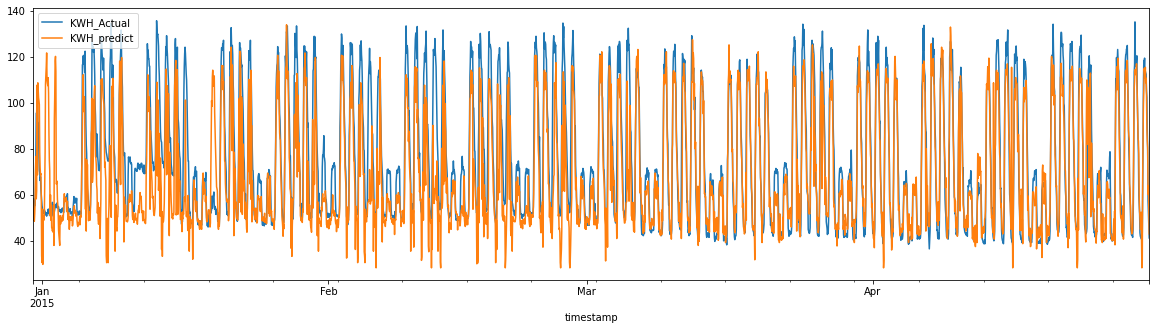

In [50]:
#plot set
Actual_predict_plot.plot(figsize=(20,5))